Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
<hr> | <hr>
<u>Title:  Hands-on Activity 8.1 Saving Models
**Name** | Gallano,Genaro

**Section** | CPE32S1
**Date Performed**: | 7/8/2024
**Date Submitted**: | 7/8/2024
**Instructor**: |
<hr> | <hr>

# **INSTRUCTIONS:**

1. Choose any dataset applicable to either a classification problem or a regression problem.

**Respiratory Disease (3-Way Classification) Dataset**

2. Explain your datasets and the problem being addressed.

The test and train dataset, which is made up of chest CT scan pictures from individuals with different respiratory ailments and is divided into three classes—Normal, Pneumonia, and COVID-19—was created using a straightforward directory structure. CT scans from patients with healthy lungs and no COVID-19 infection or pneumonia can be classified as normal; CT scans from patients with pneumonia caused by bacteria, viruses, or fungi and showing typical signs of lung inflammation and consolidation can be classified as pneumonia; and CT scans from patients with COVID-19, which is caused by the SARS-CoV-2 virus, can be classified as pneumonia. Ground-glass opacities, consolidation, crazy-paving patterns, and other anomalies suggestive of COVID-19 pneumonia may be seen on these scans.

A collection of axial slices from chest CT scans is included in the dataset. The images are stored as normal JPEG or PNG file formats or as high-resolution DICOM format images.
Every image has a label indicating the class it belongs to (Normal, Pneumonia, or COVID-19). Metadata including patient demographics, clinical history, and imaging characteristics (e.g., pixel spacing, slice thickness) are included in the dataset. Images may be distributed differently throughout classes; COVID-19 instances are probably less common than normal and pneumonia cases.

3. Show evidence that you can do the following:

- Save a model in HDF5 format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


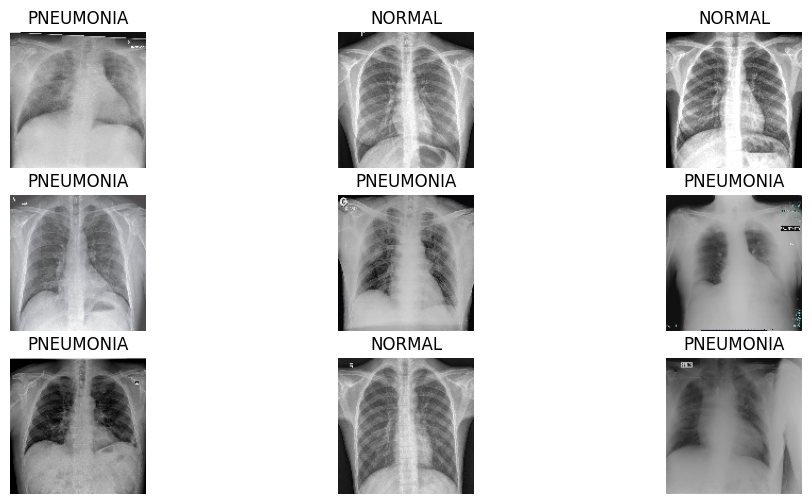

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Define directories
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/xray_dataset_covid19/test'

def load_data(directory):
    paths = []
    labels = []
    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            paths.append(os.path.join(directory, label, image))
            labels.append(label)
    paths, labels = shuffle(paths, labels)
    return paths, labels

def augment_image(image):
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

def open_images(paths, target_size=(128, 128)):
    images = []
    for path in paths:
        image = load_img(path, target_size=target_size)
        image = augment_image(image)
        images.append(image)
    return np.array(images)

def plot_images(images, labels, figsize=(12, 6)):
    fig = plt.figure(figsize=figsize)
    for i in range(len(images)):
        fig.add_subplot(3, 3, i+1)
        plt.axis('off')
        plt.title(labels[i])
        plt.imshow(images[i])
    plt.show()

train_paths, train_labels = load_data(train_dir)
test_paths, test_labels = load_data(test_dir)
images = open_images(train_paths[:9])
labels = train_labels[:9]
plot_images(images, labels)

In [ ]:
# Load data
train_paths, train_labels = load_data(train_dir)
test_paths, test_labels = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
num_classes = len(label_encoder.classes_)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Convert images to numpy arrays
X_train = open_images(train_paths)
X_test = open_images(test_paths)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(train_labels_encoded, num_classes)
y_test = keras.utils.to_categorical(test_labels_encoded, num_classes)

# Define the CNN model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
5/5 [==============================] - 7s 1s/step - loss: 1.1121 - accuracy: 0.4737 - val_loss: 0.6912 - val_accuracy: 0.4667
Epoch 2/10
5/5 [==============================] - 4s 678ms/step - loss: 0.6428 - accuracy: 0.5414 - val_loss: 0.5656 - val_accuracy: 0.8667
Epoch 3/10
5/5 [==============================] - 4s 680ms/step - loss: 0.5101 - accuracy: 0.8346 - val_loss: 0.3796 - val_accuracy: 0.8667
Epoch 4/10
5/5 [==============================] - 5s 967ms/step - loss: 0.2890 - accuracy: 0.9023 - val_loss: 1.8982 - val_accuracy: 0.5333
Epoch 5/10
5/5 [==============================] - 5s 848ms/step - loss: 0.6829 - accuracy: 0.7594 - val_loss: 0.3461 - val_accuracy: 0.8667
Epoch 6/10
5/5 [==============================] - 3s 665ms/step - loss: 0.4760 - accuracy: 0.8120 - val_loss: 0.4350 - val_accuracy: 0.9333
Epoch 7/10
5/5 [==============================] - 3s 674ms/step - loss: 0.2683 - a

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy of the trained model:", accuracy)

2/2 [==============================] - 1s 105ms/step - loss: 0.0485 - accuracy: 0.9750
Accuracy of the trained model: 0.9750000238418579


In [ ]:
model.save("/content/drive/MyDrive/xray_dataset_covid19/respiratory.h5")

- Save a model and load the model in a JSON format

In [ ]:
from tensorflow.keras.models import model_from_json

# Convert the model architecture to JSON
model_json = model.to_json()

# Save the model architecture to a JSON file
with open("/content/drive/MyDrive/xray_dataset_covid19/respiratory.json", "w") as json_file:
    json_file.write(model_json)

print("Model architecture is completely saved!")

# Compile the model before training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save the trained model weights
model.save_weights("/content/drive/MyDrive/xray_dataset_covid19/respiratory_weights.h5")
print("Model weights are completely saved!")

# Load the model architecture from the JSON file
with open("/content/drive/MyDrive/xray_dataset_covid19/respiratory.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Create a new model from the loaded JSON
loaded_model = model_from_json(loaded_model_json)

print("Model architecture loaded")

# Compile the loaded model
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
print("Loaded model compiled successfully")

# Load the weights into the loaded model
loaded_model.load_weights("/content/drive/MyDrive/xray_dataset_covid19/respiratory_weights.h5")
print("Model weights loaded successfully")

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print("Accuracy of the loaded model:", test_acc)


Model architecture is completely saved!
Model weights are completely saved!
Model architecture loaded
Loaded model compiled successfully
Model weights loaded successfully
2/2 [==============================] - 1s 118ms/step - loss: 0.0485 - accuracy: 0.9750
Accuracy of the loaded model: 0.9750000238418579


- Save a model and load the model in a YAML format


In [ ]:
from tensorflow.keras.models import model_from_yaml

# Convert the model architecture to YAML
model_yaml = model.to_json()

# Save the model architecture to a YAML file
with open("/content/drive/MyDrive/xray_dataset_covid19/respiratory.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

print("Model architecture is completely saved!")

# Save the trained model weights
model.save_weights("/content/drive/MyDrive/xray_dataset_covid19/respiratory2_weights.h5")
print("Model weights are completely saved!")

# Load the model architecture from the YAML file
with open("/content/drive/MyDrive/xray_dataset_covid19/respiratory.yaml", "r") as yaml_file:
    loaded_model_yaml = yaml_file.read()

# Create a new model from the loaded YAML
loaded_model = model_from_json(loaded_model_yaml)

print("Model architecture loaded")

# Compile the loaded model
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
print("Loaded model compiled successfully")

# Load the weights into the loaded model
loaded_model.load_weights("/content/drive/MyDrive/xray_dataset_covid19/respiratory2_weights.h5")
print("Model weights loaded successfully")

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print("Accuracy of the loaded model:", test_acc)

Model architecture is completely saved!
Model weights are completely saved!
Model architecture loaded
Loaded model compiled successfully
Model weights loaded successfully
2/2 [==============================] - 1s 61ms/step - loss: 0.0485 - accuracy: 0.9750
Accuracy of the loaded model: 0.9750000238418579


- Checkpoint Neural Network Model Improvements


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Encode and decode labels
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

# Data generator function
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)            

In [ ]:
# Define checkpoint filepath
filepath = "/content/drive/MyDrive/xray_dataset_covid19/weights-improvement-final-{epoch:02d}-{accuracy:.2f}.hdf5"

# Create ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

# Callbacks list
callbacks_list = [checkpoint]

# Fit the model with callbacks
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, callbacks=callbacks_list, verbose=0)


Epoch 1: accuracy improved from -inf to 0.50376, saving model to /content/drive/MyDrive/xray_dataset_covid19/weights-improvement-final-01-0.50.hdf5

Epoch 2: accuracy improved from 0.50376 to 0.69925, saving model to /content/drive/MyDrive/xray_dataset_covid19/weights-improvement-final-02-0.70.hdf5

Epoch 3: accuracy improved from 0.69925 to 0.81955, saving model to /content/drive/MyDrive/xray_dataset_covid19/weights-improvement-final-03-0.82.hdf5

Epoch 4: accuracy did not improve from 0.81955

Epoch 5: accuracy improved from 0.81955 to 0.90977, saving model to /content/drive/MyDrive/xray_dataset_covid19/weights-improvement-final-05-0.91.hdf5


- Checkpoint Best Neural Network Model only


In [ ]:
# Define checkpoint filepath
filepath = "/content/drive/MyDrive/xray_dataset_covid19/weights.best.hdf5"

# Create ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

# Callbacks list
callbacks_list = [checkpoint]

# Fit the model with callbacks
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, callbacks=callbacks_list, verbose=0)


Epoch 1: accuracy improved from -inf to 0.92481, saving model to /content/drive/MyDrive/xray_dataset_covid19/weights.best.hdf5

Epoch 2: accuracy improved from 0.92481 to 0.96992, saving model to /content/drive/MyDrive/xray_dataset_covid19/weights.best.hdf5

Epoch 3: accuracy did not improve from 0.96992

Epoch 4: accuracy improved from 0.96992 to 0.98496, saving model to /content/drive/MyDrive/xray_dataset_covid19/weights.best.hdf5

Epoch 5: accuracy did not improve from 0.98496


- Load a saved Neural Network model

In [ ]:
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/xray_dataset_covid19/weights.best.hdf5")
print("Successfully loaded the best weight model!")

# Compile the loaded model
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

print("Loaded model compiled successfully")

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print("Accuracy of the loaded model:", test_acc)

Successfully loaded the best weight model!
Loaded model compiled successfully
2/2 [==============================] - 1s 64ms/step - loss: 0.0047 - accuracy: 1.0000
Accuracy of the loaded model: 1.0


- Visualize Model Training History in Keras

Epoch 1/5
5/5 [==============================] - 5s 1s/step - loss: 0.0427 - accuracy: 0.9850 - val_loss: 0.4094 - val_accuracy: 0.9333
Epoch 2/5
5/5 [==============================] - 8s 2s/step - loss: 0.0340 - accuracy: 0.9850 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 4s 737ms/step - loss: 0.0994 - accuracy: 0.9774 - val_loss: 0.6458 - val_accuracy: 0.9333
Epoch 4/5
5/5 [==============================] - 3s 680ms/step - loss: 0.1542 - accuracy: 0.9248 - val_loss: 0.4378 - val_accuracy: 0.8667
Epoch 5/5
5/5 [==============================] - 3s 654ms/step - loss: 0.1488 - accuracy: 0.9624 - val_loss: 0.4989 - val_accuracy: 0.9333


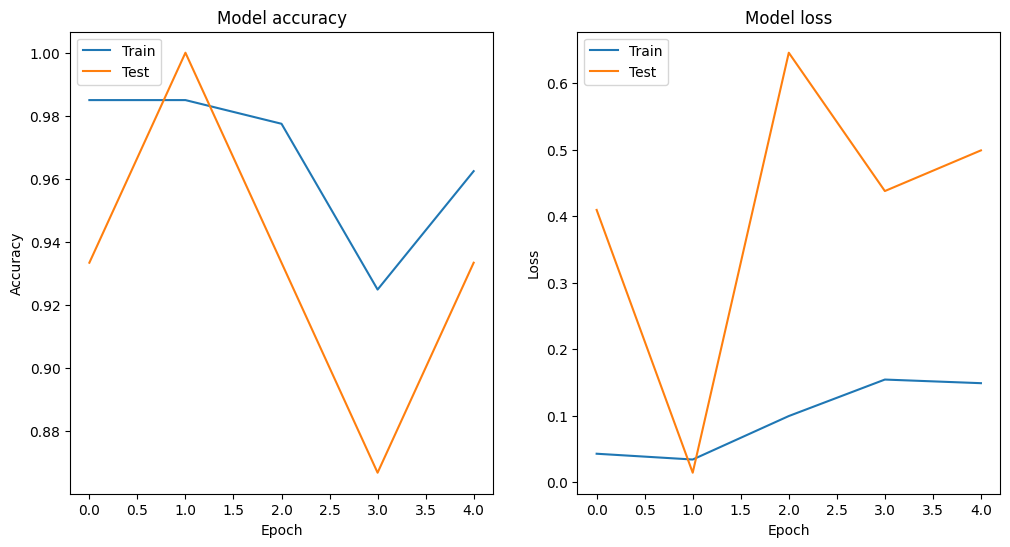

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Visualize Model Training History
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Visualize training history
plot_history(history)

- Show the application of Dropout Regularization

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Define directories
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/xray_dataset_covid19/test'

def load_data(directory):
    paths = []
    labels = []
    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            paths.append(os.path.join(directory, label, image))
            labels.append(label)
    paths, labels = shuffle(paths, labels)
    return paths, labels

def augment_image(image):
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

def open_images(paths, target_size=(128, 128)):
    images = []
    for path in paths:
        image = load_img(path, target_size=target_size)
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encode and decode labels
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

# Data generator function
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

model_dropreg = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_dropreg.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_dropreg = model_dropreg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss_dropreg, test_acc_dropreg = model_dropreg.evaluate(X_test, y_test)
print("Baseline Accuracy:", test_acc_dropreg)

- Show the application of Dropout on the visible layer

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Define directories
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/xray_dataset_covid19/test'

def load_data(directory):
    paths = []
    labels = []
    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            paths.append(os.path.join(directory, label, image))
            labels.append(label)
    paths, labels = shuffle(paths, labels)
    return paths, labels

def augment_image(image):
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

def open_images(paths, target_size=(128, 128)):
    images = []
    for path in paths:
        image = load_img(path, target_size=target_size)
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encode and decode labels
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

# Data generator function
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

model_dropvib = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.5), # Dropout regularization applied on the visible layer
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_dropvib.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_dropvib = model_dropvib.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss_dropvib, test_acc_dropvib = model_dropvib.evaluate(X_test, y_test)
print("Dropout Regularization on the Visible Layer Accuracy:", test_acc_dropvib)

- Show the application of Dropout on the hidden layer

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Define directories
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/xray_dataset_covid19/test'

def load_data(directory):
    paths = []
    labels = []
    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            paths.append(os.path.join(directory, label, image))
            labels.append(label)
    paths, labels = shuffle(paths, labels)
    return paths, labels

def augment_image(image):
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

def open_images(paths, target_size=(128, 128)):
    images = []
    for path in paths:
        image = load_img(path, target_size=target_size)
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encode and decode labels
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

# Data generator function
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

model_dropreg_hidden = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout added on the hidden layer
    Dense(num_classes, activation='softmax')
])

model_dropreg_hidden.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_dropreg_hidden = model_dropreg_hidden.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss_dropreg_hidden, test_acc_dropreg_hidden = model_dropreg_hidden.evaluate(X_test, y_test)
print("Dropout Regularization on the Hidden Layer Accuracy:", test_acc_dropreg_hidden)

- Show the application of a time-based learning rate schedule

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Define directories
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/xray_dataset_covid19/test'

def load_data(directory):
    paths = []
    labels = []
    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            paths.append(os.path.join(directory, label, image))
            labels.append(label)
    paths, labels = shuffle(paths, labels)
    return paths, labels

def augment_image(image):
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

def open_images(paths, target_size=(128, 128)):
    images = []
    for path in paths:
        image = load_img(path, target_size=target_size)
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encode and decode labels
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

# Data generator function
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

# Define a time-based learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.01
    decay = 0.1
    lr = initial_lr * (1 / (1 + decay * epoch))
    return lr

# Load data
train_paths, train_labels = load_data(train_dir)
test_paths, test_labels = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
num_classes = len(label_encoder.classes_)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Define the CNN model with Dropout
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout applied to the hidden layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the LearningRateScheduler callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

# Fit the model with the LearningRateScheduler callback
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks = [lr_scheduler])

# Evaluate the model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print("Accuracy with Time-based Learning Rate Schedule:", test_acc)

- Show the application of a drop-based learning rate schedule

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Define directories
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/xray_dataset_covid19/test'

def load_data(directory):
    paths = []
    labels = []
    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            paths.append(os.path.join(directory, label, image))
            labels.append(label)
    paths, labels = shuffle(paths, labels)
    return paths, labels

def augment_image(image):
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

def open_images(paths, target_size=(128, 128)):
    images = []
    for path in paths:
        image = load_img(path, target_size=target_size)
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encode and decode labels
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

# Data generator function
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

# Define a drop-based learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Load data
train_paths, train_labels = load_data(train_dir)
test_paths, test_labels = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
num_classes = len(label_encoder.classes_)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Define the CNN model with Dropout
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the LearningRateScheduler callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

# Fit the model with the LearningRateScheduler callback
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks = [lr_scheduler])

# Evaluate the model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print("Accuracy with Drop-based Learning Rate Schedule:", test_acc)